### Pull all data for all trials in last 5 years

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from src.api_client.client import ClinicalTrials

ct = ClinicalTrials()

# Calculate the start date (five years ago)
start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')

today = datetime.now().strftime('%Y-%m-%d')

last_five_years = ct.get_full_studies(search_expr=f"AREA[StartDate]RANGE[{start_date}, {today}]", max_studies=500000, fmt="csv")

df = pd.DataFrame.from_records(last_five_years[1:], columns=last_five_years[0])

df.head()

/Users/anthonyrajecki-doyle/Documents/GitHub/de-case/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT06289062,Neoadjuvant Chemotherapy Plus Camrelizumab for...,https://clinicaltrials.gov/study/NCT06289062,,NOT_YET_RECRUITING,"This multicenter, prospective clinical trial i...",NO,Cervical Cancer|Neoadjuvant Chemoimmunotherapy...,DRUG: Camrelizumab|DRUG: Cisplatin|DRUG: Nab p...,"Pathologic complete response, Proportion of pa...",...,Allocation: NA|Intervention Model: SINGLE_GROU...,NACI-CERV-005,2024-03-01,2025-12-01,2030-12-01,2024-03-01,,2024-03-01,"Tongji Hospital, Tongji Medical College, Huazh...",
1,NCT03963362,The Pharmacokinetics of GLA5PR Tablet Accordin...,https://clinicaltrials.gov/study/NCT03963362,,UNKNOWN,To evauate pharmacokinetics of GLA5PR tablet a...,NO,Neuropathic Pain,DRUG: GLA5PR tablet 75 mg|DRUG: GLA5PR tablet ...,"The Cmax of Pregabalin, Cmax, Pre-dose, 1, 2, ...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,GLA5PR-107,2019-09-17,2020-12-31,2021-06-30,2019-05-24,,2020-07-23,"Asan Medical Center, Seoul, Songpa-gu, 05505, ...",
2,NCT05251662,Sintilimab Combined With GEMOX ± IBI305 (Bevac...,https://clinicaltrials.gov/study/NCT05251662,,RECRUITING,"A randomized controlled, phase II clinical tri...",NO,Intrahepatic Cholangiocarcinoma,DRUG: Sintilimab|DRUG: IBI305|DRUG: GEMOX,"Overall response rate ( ORR), Overall response...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,SGBICC,2022-01-13,2024-01-13,2025-01-13,2022-02-23,,2022-02-23,Tianjin Medical University Cancer Institute & ...,
3,NCT04099862,Eus-giuded Biliary Drainage With Ec-lams vs ER...,https://clinicaltrials.gov/study/NCT04099862,EUS-BD,RECRUITING,Endoscopic retrograde cholangiopancreatography...,NO,DISTAL MALIGNANT BILIARY OBSTRUCTION,PROCEDURE: ERCP|PROCEDURE: EUS-BD,"Rate of post-procedural acute pancreatitis, 6 ...",...,Observational Model: |Time Perspective: p,2339,2021-02-28,2023-12-31,2023-12-31,2019-09-23,,2023-03-21,"Endoscopy Unit, Humanitas Research Hospital, R...",
4,NCT04908280,Study of Ruxolitinib Cream for the Treatment o...,https://clinicaltrials.gov/study/NCT04908280,,COMPLETED,The purpose of this study is to assess the pot...,NO,Discoid Lupus Erythematosus,DRUG: Ruxolitinib,Mean change in the severity of disease as meas...,...,Allocation: NA|Intervention Model: SINGLE_GROU...,STUDY00006186,2022-05-04,2024-03-04,2024-03-04,2021-06-01,,2024-03-25,"UR Medicine Dermatology College Town, Rocheste...",


In [2]:
df.columns


Index(['NCT Number', 'Study Title', 'Study URL', 'Acronym', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Study Documents'],
      dtype='object')

In [3]:
df["Funder Type"].unique()

array(['OTHER', 'INDUSTRY', 'FED', 'NETWORK', 'NIH', 'OTHER_GOV',
       'UNKNOWN', 'INDIV'], dtype=object)

In [4]:
df["Phases"]
# Count number of studies per phase
df["Phases"].value_counts()

Phases
NA               77612
                 43825
PHASE2           15359
PHASE1           12005
PHASE3            8324
PHASE4            6911
PHASE1|PHASE2     4643
EARLY_PHASE1      2323
PHASE2|PHASE3     1875
Name: count, dtype: int64

In [5]:
# Count the number of studies by sponsor and return the top 20
df["Sponsor"].value_counts().head(20)

Sponsor
Assiut University                                                      2251
Cairo University                                                       1976
Assistance Publique - Hôpitaux de Paris                                1335
Riphah International University                                        1194
Mayo Clinic                                                             957
Ain Shams University                                                    715
Hospices Civils de Lyon                                                 662
AstraZeneca                                                             646
M.D. Anderson Cancer Center                                             637
Sohag University                                                        636
Pfizer                                                                  631
Stanford University                                                     620
Massachusetts General Hospital                                          613
Chin

In [6]:
# Filter to for Funder Type == "INDUSTRY" and count the number of studies by sponsor and return the top 20
df[df["Funder Type"] == "INDUSTRY"]["Sponsor"].value_counts().head(20)

Sponsor
AstraZeneca                                         646
Pfizer                                              631
Novartis Pharmaceuticals                            523
Eli Lilly and Company                               387
Boehringer Ingelheim                                327
AbbVie                                              302
Bristol-Myers Squibb                                299
Jiangsu HengRui Medicine Co., Ltd.                  299
Janssen Research & Development, LLC                 276
Novo Nordisk A/S                                    275
Merck Sharp & Dohme LLC                             273
Hoffmann-La Roche                                   263
Takeda                                              261
Bayer                                               260
GlaxoSmithKline                                     236
Sanofi                                              217
Chia Tai Tianqing Pharmaceutical Group Co., Ltd.    176
Amgen                                   

In [7]:
# Filter for Sponsor == "Novo Nordisk" and return unique values for "Conditions"

Novo_Conditions = df[df["Sponsor"] == "Novo Nordisk A/S"]["Conditions"].unique()

# across list, unpack the strings split by |
conditions = [item for sublist in Novo_Conditions for item in sublist.split("|")]

# create dataframe from list and count the number of times each condition appears
df_conditions = pd.DataFrame(conditions, columns=["Condition"])
df_conditions["Condition"].value_counts().head(20)

Condition
Healthy Volunteers                                17
Obesity                                           12
Diabetes Mellitus, Type 2                         11
Overweight                                         8
Chronic Kidney Disease                             6
Diabetes Mellitus, Type 1                          4
Type 2 Diabetes                                    4
Heart Failure                                      3
Cardiovascular Risk                                3
Haemophilia A                                      3
Haemophilia B                                      2
Atherosclerotic Cardiovascular Disease             2
Growth Hormone Deficiency in Children              2
Hepatic Impairment                                 2
Systemic Inflammation                              2
Haemophilia A With or Without Inhibitors           2
Haemophilia A With Inhibitors                      2
Inflammation                                       2
Type 2 Diabetes Mellitus            

In [8]:
# from df conditions, exclude healthy volunteers and  'Healthy Participants', and make a list of all conditions with a value count greater than 1
df_conditions = df_conditions[df_conditions["Condition"] != "Healthy Participants"]
conditions = df_conditions["Condition"].value_counts()
conditions = conditions[conditions > 1]
conditions
# make a list of the conditions
conditions = conditions.index.tolist()
conditions

['Healthy Volunteers',
 'Obesity',
 'Diabetes Mellitus, Type 2',
 'Overweight',
 'Chronic Kidney Disease',
 'Type 2 Diabetes',
 'Diabetes Mellitus, Type 1',
 'Heart Failure',
 'Cardiovascular Risk',
 'Haemophilia A',
 'Haemophilia B',
 'Atherosclerotic Cardiovascular Disease',
 'Growth Hormone Deficiency in Children',
 'Hepatic Impairment',
 'Systemic Inflammation',
 'Haemophilia A With or Without Inhibitors',
 'Haemophilia A With Inhibitors',
 'Inflammation',
 'Atherosclerotic Cardiovascular Disease (ASCVD)',
 'Type 2 Diabetes Mellitus',
 'Chronic Kidney Disease (CKD)',
 'Noonan Syndrome']

In [9]:
# filter df for sponsors who's conditions are in the list of conditions by string match
df_filtered = df[df["Conditions"].str.contains("|".join(conditions))]
# Filter for sponsor 1= "Novo Nordisk" 
df_filtered = df_filtered[df_filtered["Sponsor"] != "Novo Nordisk A/S"]
# Filter for Funder Type == "INDUSTRY"
df_filtered = df_filtered[df_filtered["Funder Type"] == "INDUSTRY"]
# Produce a count of the number of studies by sponsor
df_filtered["Sponsor"].value_counts().head(20)


/var/folders/kd/cqrkyndx05bfj15gr0nm95t40000gn/T/ipykernel_73708/3201796976.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df[df["Conditions"].str.contains("|".join(conditions))]


Sponsor
Eli Lilly and Company                       109
AstraZeneca                                  82
Bayer                                        58
Pfizer                                       44
Novartis Pharmaceuticals                     37
Boehringer Ingelheim                         36
Sanofi Pasteur, a Sanofi Company             35
Takeda                                       35
Bristol-Myers Squibb                         32
Daewoong Pharmaceutical Co. LTD.             22
Sanofi                                       22
AbbVie                                       21
Celgene                                      20
Jiangsu HengRui Medicine Co., Ltd.           20
Amgen                                        15
Chong Kun Dang Pharmaceutical                14
Regeneron Pharmaceuticals                    13
Astellas Pharma Global Development, Inc.     12
Abbott Medical Devices                       12
Shandong Suncadia Medicine Co., Ltd.         12
Name: count, dtype: int64

Given the comprehensive list of fields available in the ClinicalTrials.gov dataset, we can derive valuable insights for a competitor benchmark analysis. We'll focus on key areas like:

- Sponsor Activity: Identify the most active sponsors, their areas of focus (therapeutic areas), and trends in their trial initiations over time.
- Study Designs and Phases: Analyze the distribution of study designs (e.g., randomized, observational) and phases (Phase 1, 2, 3) to understand industry trends and competitor strategies.
- Therapeutic Areas: Determine the most common therapeutic areas being investigated, highlighting potential areas of high competition or unmet medical needs.
- Collaboration Patterns: Examine collaborations between sponsors and other organizations (e.g., academic institutions) to identify potential partnership opportunities or competitive alliances.
- Geographic Distribution: Analyze the geographic locations of trial sites to understand where competitors are focusing their research efforts.

## Build some key metrics for "Competitors"

Given Novo Nordisk AS specific clinical portfolio, we identify competitors principally from the Industry Sponsors who run several trials focused on the same conditions. This could either be as a Lead Sponsor or a Collaborator. After establishing a master set of competitors, several key metrics and visualisations will be developed including

### Metrics

- For each theraputic area, the number of trials each competitor has started
- For each theraputic area, the number of trials in each phase


### Visualisations
- For each competitor, the geographic distribution of trials they are running in areas of our concern


In [10]:
df_conditions

,Condition
0,Overweight
1,Obesity
2,"Diabetes Mellitus, Type 2"
3,Obesity
4,Healthy Volunteers
...,...
153,Cardiometabolic Diseases
154,Growth Hormone Deficiency in Children
155,Born Small for Gestational Age
156,Obesity


### First we build the list of competitors from overlapping conditions

In [11]:
df.columns

Index(['NCT Number', 'Study Title', 'Study URL', 'Acronym', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Study Documents'],
      dtype='object')

In [12]:
def get_conditions(df):
    MIN_NO_OF_STUDIES = 1

    # Filter for "Novo Nordisk A/S" and get unique conditions
    Novo_Conditions = df[df["Sponsor"] == "Novo Nordisk A/S"]["Conditions"].unique()

    # Across list, unpack the strings split by "|"
    conditions = [item for sublist in Novo_Conditions for item in sublist.split("|")]

    # Create dataframe from list
    df_conditions = pd.DataFrame(conditions, columns=["Condition"])

    # Exclude 'Healthy Participants' from df_conditions
    df_conditions = df_conditions[~df_conditions["Condition"].isin(["Healthy Participants", "Healthy Volunteers"])]
    
    # Make a list of all conditions with a value count greater than 1
    conditions = df_conditions["Condition"].value_counts()
    conditions = conditions[conditions > MIN_NO_OF_STUDIES]
    
    # Convert the conditions to a list
    conditions = conditions.index.tolist()
    
    return conditions

conditions = get_conditions(df)

In [13]:
conditions

['Obesity',
 'Diabetes Mellitus, Type 2',
 'Overweight',
 'Chronic Kidney Disease',
 'Type 2 Diabetes',
 'Diabetes Mellitus, Type 1',
 'Heart Failure',
 'Cardiovascular Risk',
 'Haemophilia A',
 'Haemophilia B',
 'Atherosclerotic Cardiovascular Disease',
 'Growth Hormone Deficiency in Children',
 'Hepatic Impairment',
 'Systemic Inflammation',
 'Haemophilia A With or Without Inhibitors',
 'Haemophilia A With Inhibitors',
 'Inflammation',
 'Atherosclerotic Cardiovascular Disease (ASCVD)',
 'Type 2 Diabetes Mellitus',
 'Chronic Kidney Disease (CKD)',
 'Noonan Syndrome']

### Now get the competitors in these areas

In [14]:
def get_competitors(df, conditions):
    MIN_NO_COMPETITORS_STUDIES = 10

    # filter df for sponsors who's conditions are in the list of conditions by string match
    df_filtered = df[df["Conditions"].str.contains("|".join(conditions))]
    # Filter for sponsor 1= "Novo Nordisk" 
    df_filtered = df_filtered[df_filtered["Sponsor"] != "Novo Nordisk A/S"]
    # Filter for Funder Type == "INDUSTRY"
    df_filtered = df_filtered[df_filtered["Funder Type"] == "INDUSTRY"]
    # Filter for value_counts greater than 10 and cast to list
    competitors = df_filtered["Sponsor"].value_counts()[df_filtered["Sponsor"].value_counts() > MIN_NO_COMPETITORS_STUDIES].index.tolist()
    return competitors

competitors = get_competitors(df, conditions)

/var/folders/kd/cqrkyndx05bfj15gr0nm95t40000gn/T/ipykernel_73708/3065310362.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df[df["Conditions"].str.contains("|".join(conditions))]


### Now get the NCTID's of relevant studies from our competitors and creaete a master list of relevant trials by competitor

In [15]:
competitors

# Filter df for sponsors in the list of competitors
df_competitors = df[df["Sponsor"].isin(competitors)]

# Filter df_competitors for rows where the "Conditions" column has a string match with a condition in the list conditions
df_competitors = df_competitors[df_competitors["Conditions"].str.contains('|'.join(conditions))]

# Create a dictionary of the NCT Number of the studies by sponsor 
studies_by_sponsor = df_competitors.groupby("Sponsor")["NCT Number"].apply(list).to_dict()
studies_by_sponsor


/var/folders/kd/cqrkyndx05bfj15gr0nm95t40000gn/T/ipykernel_73708/264391286.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_competitors = df_competitors[df_competitors["Conditions"].str.contains('|'.join(conditions))]


{'Abbott Medical Devices': ['NCT06306573',
  'NCT04703855',
  'NCT03982979',
  'NCT05428384',
  'NCT05887323',
  'NCT04915924',
  'NCT04100148',
  'NCT04069156',
  'NCT04464785',
  'NCT06436053',
  'NCT04548128',
  'NCT04595305'],
 'Amgen': ['NCT06352892',
  'NCT04478708',
  'NCT05378529',
  'NCT04887064',
  'NCT06295679',
  'NCT05581303',
  'NCT04292275',
  'NCT05669599',
  'NCT05406115',
  'NCT05481411',
  'NCT04199351'],
 'AstraZeneca': ['NCT06243029',
  'NCT04655027',
  'NCT04847531',
  'NCT05635331',
  'NCT06203704',
  'NCT06268873',
  'NCT04001231',
  'NCT05266404',
  'NCT05866276',
  'NCT06338839',
  'NCT04798222',
  'NCT04492722',
  'NCT05160974',
  'NCT04327024',
  'NCT03990363',
  'NCT06087835',
  'NCT04550234',
  'NCT06099067',
  'NCT05737940',
  'NCT05432167',
  'NCT04556760',
  'NCT05188144',
  'NCT04445714',
  'NCT05306210',
  'NCT04072523',
  'NCT04256629',
  'NCT04034992',
  'NCT06372431',
  'NCT04208620',
  'NCT04986202',
  'NCT05434923',
  'NCT06350123',
  'NCT0579030

In [16]:
def get_studies_by_sponsor(df):
    # Call the previous functions to create competitors and conditions
    conditions = get_conditions(df)
    competitors = get_competitors(df, conditions)

    # Filter df for sponsors in the list of competitors
    df_competitors = df[df["Sponsor"].isin(competitors)]

    # Filter df_competitors for rows where the "Conditions" column has a string match with a condition in the list conditions
    df_competitors = df_competitors[df_competitors["Conditions"].str.contains('|'.join(conditions))]

    # Create a dictionary of the NCT Number of the studies by sponsor 
    studies_by_sponsor = df_competitors.groupby("Sponsor")["NCT Number"].apply(list).to_dict()

    return studies_by_sponsor

studies_by_sponsor = get_studies_by_sponsor(df)
studies_by_sponsor

/var/folders/kd/cqrkyndx05bfj15gr0nm95t40000gn/T/ipykernel_73708/3065310362.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df[df["Conditions"].str.contains("|".join(conditions))]
/var/folders/kd/cqrkyndx05bfj15gr0nm95t40000gn/T/ipykernel_73708/4116327369.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_competitors = df_competitors[df_competitors["Conditions"].str.contains('|'.join(conditions))]


{'Abbott Medical Devices': ['NCT06306573',
  'NCT04703855',
  'NCT03982979',
  'NCT05428384',
  'NCT05887323',
  'NCT04915924',
  'NCT04100148',
  'NCT04069156',
  'NCT04464785',
  'NCT06436053',
  'NCT04548128',
  'NCT04595305'],
 'Amgen': ['NCT06352892',
  'NCT04478708',
  'NCT05378529',
  'NCT04887064',
  'NCT06295679',
  'NCT05581303',
  'NCT04292275',
  'NCT05669599',
  'NCT05406115',
  'NCT05481411',
  'NCT04199351'],
 'AstraZeneca': ['NCT06243029',
  'NCT04655027',
  'NCT04847531',
  'NCT05635331',
  'NCT06203704',
  'NCT06268873',
  'NCT04001231',
  'NCT05266404',
  'NCT05866276',
  'NCT06338839',
  'NCT04798222',
  'NCT04492722',
  'NCT05160974',
  'NCT04327024',
  'NCT03990363',
  'NCT06087835',
  'NCT04550234',
  'NCT06099067',
  'NCT05737940',
  'NCT05432167',
  'NCT04556760',
  'NCT05188144',
  'NCT04445714',
  'NCT05306210',
  'NCT04072523',
  'NCT04256629',
  'NCT04034992',
  'NCT06372431',
  'NCT04208620',
  'NCT04986202',
  'NCT05434923',
  'NCT06350123',
  'NCT0579030

In [17]:
# Save a local copy of the master list

import json

def write_to_json(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f)

# Call the function to write the dictionary to a JSON file
write_to_json(studies_by_sponsor, 'cached_data/studies_by_sponsor.json')

### Investigate the master list

In [18]:
# Filter df for trials with NCT Number in the dictionary studies_by_sponsor
competitor_trials_df = df[df["NCT Number"].isin([item for sublist in studies_by_sponsor.values() for item in sublist])]
competitor_trials_df.reset_index(drop=True, inplace=True)


In [97]:
# Create a new DataFrame by copying competitor_trials_df
intervention_df = competitor_trials_df.copy()

# Create new column "Intervention Type" from the text in the "Interventions" column before the first :
intervention_df["Intervention Type"] = intervention_df["Interventions"].str.split(":").str[0]

# Count the number of studies by "Intervention Type" - ignore '' and NaN
intervention_counts = intervention_df[intervention_df["Intervention Type"] != '']["Intervention Type"].value_counts(dropna=True)


import plotly.graph_objects as go

# Get the value counts and their index
value_counts = intervention_df[intervention_df["Intervention Type"] != '']["Intervention Type"].value_counts(dropna=True)
labels = value_counts.index

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=value_counts, hole=.3)])

# Add title
fig.update_layout(title_text="Intervention Type of Competitor Trials")

# Show the figure
fig.show()


In [99]:
import plotly.graph_objects as go

# Get the value counts and their index, sort in descending order
value_counts = competitor_trials_df["Sponsor"].value_counts().sort_values(ascending=True)
labels = value_counts.index

# Create a bar chart
fig = go.Figure(data=[go.Bar(x=value_counts, y=labels, orientation='h')])

# Add title and labels
fig.update_layout(title_text="Number of Trials by Competitor",
                  xaxis_title="Number of Trials",
                  yaxis_title="Competitor")

# Show the figure
fig.show()

In [100]:
import plotly.graph_objects as go

# Explode conditions by and group then visualise references to the conditions in the trials by competitor


def map_conditions(df, column, json_path):
    # Read the JSON file into a dictionary
    with open(json_path, 'r') as file:
        condition_groups = json.load(file)

    # Create a new column in the DataFrame that contains the group names
    df['Group'] = df[column].map(condition_groups)

    # If a condition is not in the dictionary, fill it with "Other"
    df['Group'] = df['Group'].fillna('Other')

    return df


competitor_trials_one_cond = competitor_trials_df[["NCT Number","Sponsor", "Conditions"]]

# Split the "Conditions" column by "|" and create a new row for each string in the split
competitor_trials_one_cond['Condition'] = competitor_trials_one_cond ['Conditions'].str.split('|')
competitor_trials_one_cond = competitor_trials_one_cond.explode('Condition')

# Filter competitor_trials_one_cond for conditions in the list conditions
competitor_trials_one_cond = competitor_trials_one_cond[competitor_trials_one_cond["Condition"].isin(conditions)]

competitor_trials_one_cond = map_conditions(competitor_trials_one_cond, 'Condition', 'cached_data/condition_groups.json')


# create a stacked bar chart of the data using seaborn with the count of the sponsors coloured by condition
pivot_table = competitor_trials_one_cond.pivot_table(index='Sponsor', columns='Group', aggfunc='size', fill_value=0)

# Sort the pivot table by the sum of the rows in ascending order
pivot_table = pivot_table.reindex(pivot_table.sum(axis=1).sort_values(ascending=True).index)

# Create a list of traces, one for each condition group
traces = [go.Bar(name=group, y=pivot_table.index, x=pivot_table[group], orientation='h') 
          for group in pivot_table.columns]

# Create a layout for the plot
layout = go.Layout(
    title="Number of Trials by Competitor and Condition",
    xaxis_title="Number of References to Condition in a Trial",
    yaxis_title="Sponsor",
    barmode='stack'
)

# Create a Figure and add the traces
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()

/var/folders/kd/cqrkyndx05bfj15gr0nm95t40000gn/T/ipykernel_73708/2586106016.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phase
PHASE1    151
PHASE3     90
PHASE2     55
PHASE4     24
Name: count, dtype: int64


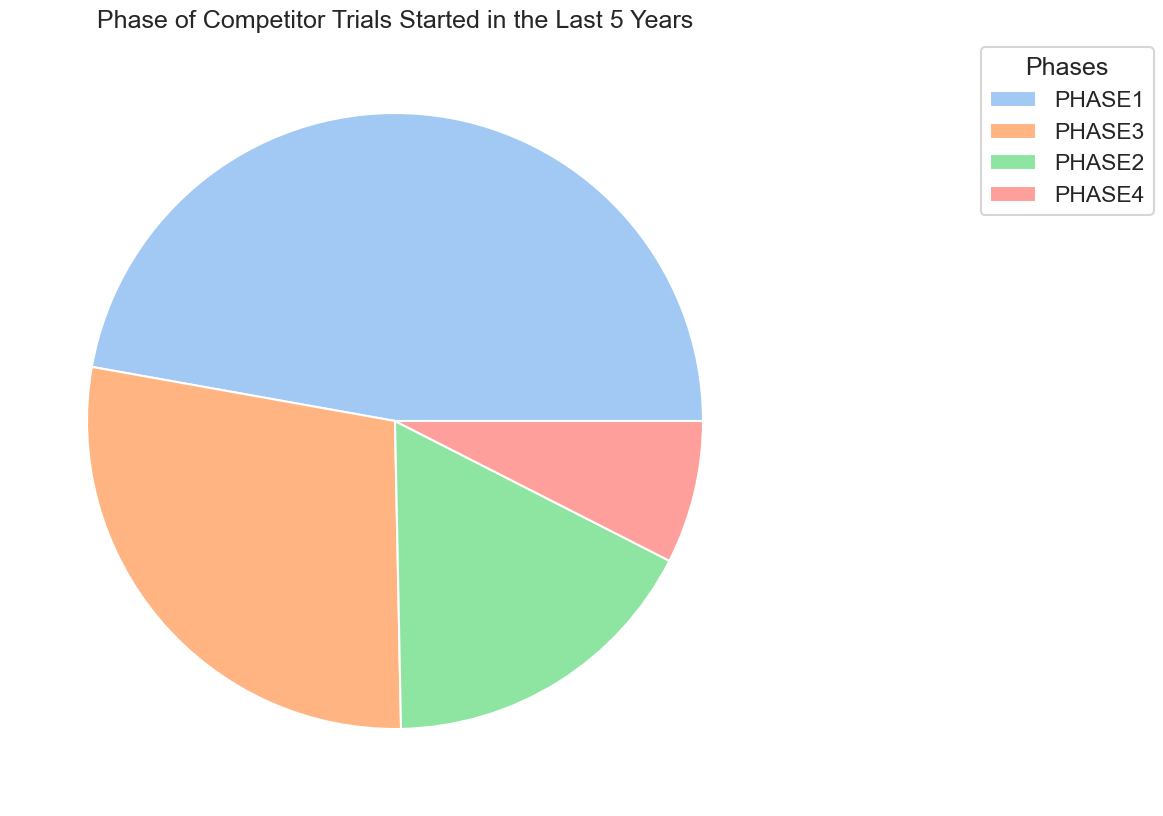

In [23]:
# Create a new DataFrame by copying competitor_trials_df
phase_df = competitor_trials_df.copy()

# Split the "Phases" column by "|" and create a new row for each string in the split
phase_df['Phase'] = phase_df['Phases'].str.split('|')
phase_df = phase_df.explode('Phase')

# Remove empty strings, 'NA' values and NA values
phase_df = phase_df[phase_df['Phase'].notna() & (phase_df['Phase'] != '') & (phase_df['Phase'] != 'NA')]

# Count the number of occurrences of each phase
phase_counts = phase_df['Phase'].value_counts()

print(phase_counts)

# Create a pie chart of the phase_counts data
plt.figure(figsize=(10, 10))
sns.set_palette("pastel")
sns.set_context("talk")
sns.set_style("whitegrid")

# Get the value counts and their index
labels = phase_counts.index

plt.pie(phase_counts)
plt.title("Phase of Competitor Trials Started in the Last 5 Years")

# Add a legend
plt.legend(labels, title="Phases", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [61]:
import plotly.graph_objects as go

# Create a copy of the DataFrame
line_df = competitor_trials_df.copy()

# Create a new DataFrame with only the "NCT Number" and "Group" columns
group_df = competitor_trials_one_cond[["NCT Number", "Group"]]

# Perform an inner join on the "NCT Number" column
line_df = pd.merge(line_df, group_df, on="NCT Number", how="inner")

line_df = line_df[["NCT Number",'Start Date', 'Completion Date', 'Group']]

# Convert the "Start Date" and "Completion Date" columns to datetime
line_df['Start Date'] = pd.to_datetime(line_df['Start Date'], format='%Y-%m', errors='coerce')
line_df['Completion Date'] = pd.to_datetime(line_df['Completion Date'], format='%Y-%m', errors='coerce')

# Drop rows with 'NaT' in 'Start Date'
line_df = line_df.dropna(subset=['Start Date'])

line_df = line_df.set_index('Start Date').groupby('Group').resample('ME').count().drop(columns='Group')


In [92]:
import pandas as pd
import plotly.express as px

import plotly.graph_objects as go

# Create a copy of the DataFrame
line_df = competitor_trials_df.copy()

# Create a new DataFrame with only the "NCT Number" and "Group" columns
group_df = competitor_trials_one_cond[["NCT Number", "Group"]]

# Perform an inner join on the "NCT Number" column
line_df = pd.merge(line_df, group_df, on="NCT Number", how="inner")

line_df = line_df[["NCT Number",'Start Date', 'Completion Date', 'Group']]

# Extract the first 4 characters and convert to integer
line_df['Year'] = line_df['Start Date'].str[:4].astype(int)
line_df['Completion Year'] = line_df['Completion Date'].str[:4].astype(int)

# Drop rows with NaN 'Year' or 'Completion Year'
line_df = line_df.dropna(subset=['Year', 'Completion Year'])

# Ensure 'Year' and 'Completion Year' are integers
line_df['Year'] = line_df['Year'].astype(int)
line_df['Completion Year'] = line_df['Completion Year'].astype(int)

# Create a new DataFrame with a row for each year that a study is active
expanded_df = pd.DataFrame([(group, year)
                            for _, row in line_df.iterrows()
                            for group in [row['Group']]
                            for year in range(row['Year'], row['Completion Year'] + 1)],
                           columns=['Group', 'Year'])

# Group by 'Group' and 'Year' and count the number of occurrences
grouped_df = expanded_df.groupby(['Group', 'Year']).size().reset_index(name='Count')

# Create a stacked line graph
fig = px.line(grouped_df, x='Year', y='Count', color='Group', line_group='Group', 
              labels={'Count':'Number of Studies'}, title='Number of Studies per Year')
fig.show()

In [63]:
line_df

NCT Number  Completion Date
Group          Start Date                             
Diabetes       2023-11-30           1                1
               2023-12-31           0                0
               2024-01-31           0                0
               2024-02-29           0                0
               2024-03-31           0                0
               2024-04-30           0                0
               2024-05-31           0                0
               2024-06-30           2                2
Kidney Disease 2023-09-30           1                0
               2023-10-31           0                0
               2023-11-30           0                0
               2023-12-31           0                0
               2024-01-31           0                0
               2024-02-29           0                0
               2024-03-31           0                0
               2024-04-30           1                1
Liver Disease  2020-12-31           1                1

In [64]:
import plotly.express as px

# Create a copy of the DataFrame
gantt_df = competitor_trials_df[["Sponsor","Start Date", "Completion Date"]].copy()

# Convert the "Start Date" and "Completion Date" columns to datetime
gantt_df['Start Date'] = pd.to_datetime(gantt_df['Start Date'], format='%Y-%m', errors='coerce')
gantt_df['Completion Date'] = pd.to_datetime(gantt_df['Completion Date'], format='%Y-%m', errors='coerce')

# Create a Gantt chart
fig = px.timeline(gantt_df, x_start='Start Date', x_end='Completion Date', y='Sponsor', color='Sponsor')

fig.update_yaxes(autorange="reversed") # reverse the order of tasks

fig.show()